In [44]:
import pandas as pd
import pickle

In [45]:
secom_data_path = "data/secom/secom.data"
secom_labels_path = "data/secom/secom_labels.data"
secom_names = "data/secom/secom.names"

wafer_data_path = "data/wm811k/LSWMD.pkl"

## SECOM


In [46]:
secom_data = pd.read_csv(secom_data_path, sep=" ", header=None)
secom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [47]:
secom_labels = pd.read_csv(secom_labels_path, sep=" ", header=None)
secom_labels.head()

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [ ]:
# takes some time to load (~20s)
with open(wafer_data_path, "rb") as f:
    data = pickle.load(f, encoding="iso-8859-1")

In [49]:
# Check what keys/structure are inside
print(data.shape)   # (811457, ?)
print(data.columns) # see what fields exist

(811457, 6)
Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')


In [50]:
# First row
example = data.iloc[0]
print(example)

# If waferMap is stored in that row:
wafer = example['waferMap']   # typically a numpy array
print(type(wafer), wafer.shape)

waferMap          [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
dieSize                                                      1683.0
lotName                                                        lot1
waferIndex                                                      1.0
trianTestLabel                                         [[Training]]
failureType                                                [[none]]
Name: 0, dtype: object
<class 'numpy.ndarray'> (45, 48)


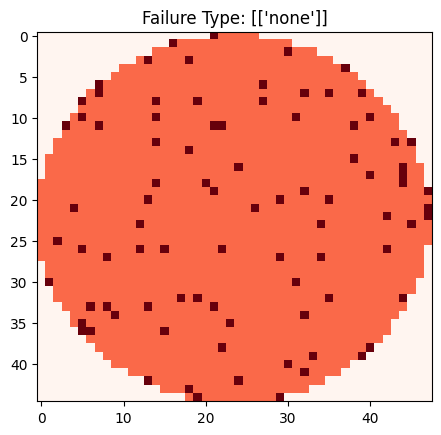

In [51]:
import matplotlib.pyplot as plt

wafer = example['waferMap']
plt.imshow(wafer, cmap="Reds")
plt.title(f"Failure Type: {example['failureType']}")
plt.show()